In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib .pyplot as plt

In [2]:
df1 = pd.read_csv('deliveries.csv')
df2 = pd.read_csv('matches.csv')


In [3]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [4]:
df1.shape,df2.shape

((260920, 17), (1095, 20))

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [7]:
df2.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [8]:
df2 = df2.dropna(subset=['winner'])

In [9]:
df2['player_of_match'] = df2['player_of_match'].fillna('Unknown')

In [10]:
df2.drop(['id', 'city', 'method'], axis=1, inplace=True)

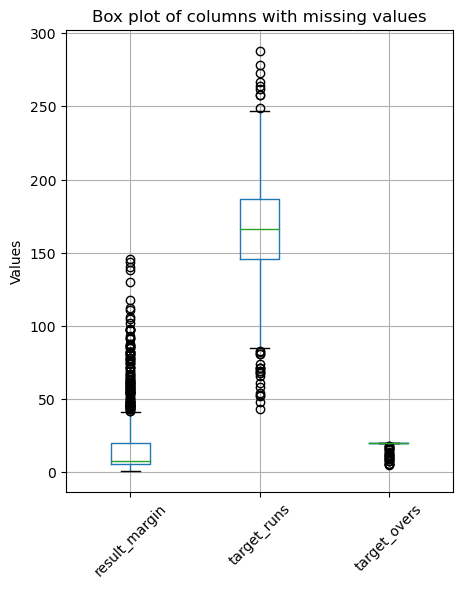

In [11]:
columns_to_handle_missing = ['result_margin', 'target_runs', 'target_overs']
plt.figure(figsize=(5, 6))
df2[columns_to_handle_missing].boxplot()
plt.title('Box plot of columns with missing values')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [12]:
df2['result_margin'] = df2['result_margin'].fillna(df2['result_margin'].median())
df2['target_runs'] = df2['target_runs'].fillna(df2['target_runs'].median())
df2['target_overs'] = df2['target_overs'].fillna(df2['target_overs'].median())

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1094
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           1090 non-null   object 
 1   date             1090 non-null   object 
 2   match_type       1090 non-null   object 
 3   player_of_match  1090 non-null   object 
 4   venue            1090 non-null   object 
 5   team1            1090 non-null   object 
 6   team2            1090 non-null   object 
 7   toss_winner      1090 non-null   object 
 8   toss_decision    1090 non-null   object 
 9   winner           1090 non-null   object 
 10  result           1090 non-null   object 
 11  result_margin    1090 non-null   float64
 12  target_runs      1090 non-null   float64
 13  target_overs     1090 non-null   float64
 14  super_over       1090 non-null   object 
 15  umpire1          1090 non-null   object 
 16  umpire2          1090 non-null   object 
dtypes: float64(3), obje

In [14]:
df2.nunique()

season              17
date               821
match_type           8
player_of_match    291
venue               58
team1               19
team2               19
toss_winner         19
toss_decision        2
winner              19
result               3
result_margin       98
target_runs        169
target_overs        15
super_over           2
umpire1             62
umpire2             62
dtype: int64

In [17]:
df2['date'] = pd.to_datetime(df2['date'])
df2['year'] = df2['date'].dt.year
df2['month'] = df2['date'].dt.month
df2['day'] = df2['date'].dt.day

# Drop the original date column
df2.drop('date', axis=1, inplace=True)

In [18]:
def split_season(season):
    if '/' in season:
        start, end = season.split('/')
        start = int(start)
        end = int('20' + end) if len(end) == 2 else int(end)
    else:
        start = end = int(season)
    return start, end

# Apply the function to create new columns
df2[['season_start', 'season_end']] = df2['season'].apply(lambda x: pd.Series(split_season(x)))

# Convert to datetime and extract year
df2['season_start'] = pd.to_datetime(df2['season_start'], format='%Y').dt.year
df2['season_end'] = pd.to_datetime(df2['season_end'], format='%Y').dt.year



In [19]:
df2['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [20]:
team_name_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Pune Warriors',
    'Rising Pune Supergiant': 'Pune Warriors',
    'Gujarat Lions': 'Gujarat Titans',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
}

team_columns = ['winner', 'team1', 'team2', 'toss_winner']


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1094
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           1090 non-null   object 
 1   match_type       1090 non-null   object 
 2   player_of_match  1090 non-null   object 
 3   venue            1090 non-null   object 
 4   team1            1090 non-null   object 
 5   team2            1090 non-null   object 
 6   toss_winner      1090 non-null   object 
 7   toss_decision    1090 non-null   object 
 8   winner           1090 non-null   object 
 9   result           1090 non-null   object 
 10  result_margin    1090 non-null   float64
 11  target_runs      1090 non-null   float64
 12  target_overs     1090 non-null   float64
 13  super_over       1090 non-null   object 
 14  umpire1          1090 non-null   object 
 15  umpire2          1090 non-null   object 
 16  year             1090 non-null   int32  
 17  month            10

In [22]:
df2.head()

,season,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,...,target_runs,target_overs,super_over,umpire1,umpire2,year,month,day,season_start,season_end
0,2007/08,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,223.0,20.0,N,Asad Rauf,RE Koertzen,2008,4,18,2007,2008
1,2007/08,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,...,241.0,20.0,N,MR Benson,SL Shastri,2008,4,19,2007,2008
2,2007/08,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,...,130.0,20.0,N,Aleem Dar,GA Pratapkumar,2008,4,19,2007,2008
3,2007/08,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,...,166.0,20.0,N,SJ Davis,DJ Harper,2008,4,20,2007,2008
4,2007/08,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,...,111.0,20.0,N,BF Bowden,K Hariharan,2008,4,20,2007,2008


In [24]:
teams = pd.concat([df2['team1'], df2['team2']]).unique()
team_stats = pd.DataFrame(teams, columns=['team_name'])
team_stats

,team_name
0,Royal Challengers Bangalore
1,Kings XI Punjab
2,Delhi Daredevils
3,Mumbai Indians
4,Kolkata Knight Riders
5,Rajasthan Royals
6,Deccan Chargers
7,Chennai Super Kings
8,Kochi Tuskers Kerala
9,Pune Warriors


In [25]:
team_stats['matches_played'] = team_stats['team_name'].apply(lambda x: len(df2[(df2['team1'] == x) | (df2['team2'] == x)]))
team_stats['matches_won'] = team_stats['team_name'].apply(lambda x: len(df2[df2['winner'] == x]))
team_stats['win_percentage'] = (team_stats['matches_won'] / team_stats['matches_played']) * 100

team_stats

,team_name,matches_played,matches_won,win_percentage
0,Royal Challengers Bangalore,237,116,48.945148
1,Kings XI Punjab,190,88,46.315789
2,Delhi Daredevils,159,67,42.138365
3,Mumbai Indians,261,144,55.172414
4,Kolkata Knight Riders,251,131,52.191235
5,Rajasthan Royals,219,112,51.141553
6,Deccan Chargers,75,29,38.666667
7,Chennai Super Kings,237,138,58.227848
8,Kochi Tuskers Kerala,14,6,42.857143
9,Pune Warriors,45,12,26.666667


In [26]:
team_stats['total_runs_scored'] = team_stats['team_name'].apply(lambda x: df2[df2['team1'] == x]['target_runs'].sum() + df2[df2['team2'] == x]['target_runs'].sum())
team_stats['total_wickets_taken'] = team_stats['team_name'].apply(lambda x: df2[df2['team1'] == x]['target_overs'].sum() + df2[df2['team2'] == x]['target_overs'].sum())

team_stats['total_runs_scored'] = team_stats['total_runs_scored'].astype(int)
team_stats['total_wickets_taken'] = team_stats['total_wickets_taken'].astype(int)

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken
0,Royal Challengers Bangalore,237,116,48.945148,39556,4675
1,Kings XI Punjab,190,88,46.315789,31391,3738
2,Delhi Daredevils,159,67,42.138365,25304,3100
3,Mumbai Indians,261,144,55.172414,43728,5214
4,Kolkata Knight Riders,251,131,52.191235,40557,4907
5,Rajasthan Royals,219,112,51.141553,36187,4358
6,Deccan Chargers,75,29,38.666667,12047,1500
7,Chennai Super Kings,237,138,58.227848,39503,4693
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277
9,Pune Warriors,45,12,26.666667,6950,900


In [27]:
team_stats['average_runs_scored_per_match'] = team_stats['total_runs_scored'] / team_stats['matches_played']
team_stats['run_rate'] = team_stats['team_name'].apply(lambda x: df1[df1['batting_team'] == x]['total_runs'].sum() / (df1[df1['batting_team'] == x].shape[0] / 6))
team_stats['economy_rate'] = team_stats['team_name'].apply(lambda x: df1[df1['bowling_team'] == x]['total_runs'].sum() / (df1[df1['bowling_team'] == x].shape[0] / 6))

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate
0,Royal Challengers Bangalore,237,116,48.945148,39556,4675,166.902954,8.018153,8.036039
1,Kings XI Punjab,190,88,46.315789,31391,3738,165.215789,7.965380,8.129075
2,Delhi Daredevils,159,67,42.138365,25304,3100,159.144654,7.759821,7.924166
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011
5,Rajasthan Royals,219,112,51.141553,36187,4358,165.237443,7.944593,7.977149
6,Deccan Chargers,75,29,38.666667,12047,1500,160.626667,7.613239,7.711915
7,Chennai Super Kings,237,138,58.227848,39503,4693,166.679325,8.089561,7.812220
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277,143.857143,7.209861,7.382900
9,Pune Warriors,45,12,26.666667,6950,900,154.444444,7.008635,7.539307


In [28]:
no_result_match_ids = [501265, 829763, 829813, 1178424, 1359519]
filtered_df1 = df1[~df1['match_id'].isin(no_result_match_ids)]

# Highest and lowest scores excluding no-result matches
highest_scores = filtered_df1.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
team_stats['highest_score'] = team_stats['team_name'].apply(lambda x: highest_scores[highest_scores['batting_team'] == x]['total_runs'].max())
team_stats['lowest_score'] = team_stats['team_name'].apply(lambda x: highest_scores[highest_scores['batting_team'] == x]['total_runs'].min())

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score
0,Royal Challengers Bangalore,237,116,48.945148,39556,4675,166.902954,8.018153,8.036039,263,49
1,Kings XI Punjab,190,88,46.315789,31391,3738,165.215789,7.965380,8.129075,232,68
2,Delhi Daredevils,159,67,42.138365,25304,3100,159.144654,7.759821,7.924166,231,58
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,68
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011,272,48
5,Rajasthan Royals,219,112,51.141553,36187,4358,165.237443,7.944593,7.977149,226,58
6,Deccan Chargers,75,29,38.666667,12047,1500,160.626667,7.613239,7.711915,214,82
7,Chennai Super Kings,237,138,58.227848,39503,4693,166.679325,8.089561,7.812220,246,55
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277,143.857143,7.209861,7.382900,184,74
9,Pune Warriors,45,12,26.666667,6950,900,154.444444,7.008635,7.539307,192,99


In [30]:
team_stats['total_4s'] = team_stats['team_name'].apply(lambda x: df1[(df1['batting_team'] == x) & (filtered_df1['batsman_runs'] == 4)].shape[0])
team_stats['total_6s'] = team_stats['team_name'].apply(lambda x: df1[(df1['batting_team'] == x) & (filtered_df1['batsman_runs'] == 6)].shape[0])

# Average Powerplay and Death overs scores
powerplay_scores = df1[(df1['over'] <= 6)].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()
death_overs_scores = df1[(df1['over'] > 15)].groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

team_stats['average_powerplay_score'] = team_stats['team_name'].apply(lambda x: powerplay_scores[powerplay_scores['batting_team'] == x]['total_runs'].mean())
team_stats['average_death_overs_score'] = team_stats['team_name'].apply(lambda x: death_overs_scores[death_overs_scores['batting_team'] == x]['total_runs'].mean())

team_stats

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score,total_4s,total_6s,average_powerplay_score,average_death_overs_score
0,Royal Challengers Bangalore,237,116,48.945148,39556,4675,166.902954,8.018153,8.036039,263,49,3118,1480,51.787500,38.259091
1,Kings XI Punjab,190,88,46.315789,31391,3738,165.215789,7.965380,8.129075,232,68,2631,1075,54.184211,35.180791
2,Delhi Daredevils,159,67,42.138365,25304,3100,159.144654,7.759821,7.924166,231,58,2139,790,52.813665,34.779310
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,68,3637,1685,53.421456,39.016260
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011,272,48,3461,1495,54.310757,35.950893
5,Rajasthan Royals,219,112,51.141553,36187,4358,165.237443,7.944593,7.977149,226,58,3088,1233,53.518182,35.517073
6,Deccan Chargers,75,29,38.666667,12047,1500,160.626667,7.613239,7.711915,214,82,957,400,51.853333,35.263889
7,Chennai Super Kings,237,138,58.227848,39503,4693,166.679325,8.089561,7.812220,246,55,3196,1509,53.295359,39.741228
8,Kochi Tuskers Kerala,14,6,42.857143,2014,277,143.857143,7.209861,7.382900,184,74,170,53,54.928571,30.636364
9,Pune Warriors,45,12,26.666667,6950,900,154.444444,7.008635,7.539307,192,99,525,196,47.577778,30.909091


In [31]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [32]:
batgroup = df1.groupby(['batter'])
batsman_stats = pd.DataFrame(batgroup['ball'].count()).rename(columns={'ball': 'balls_faced'})
batsman_stats.head()

,balls_faced
batter,
A Ashish Reddy,196
A Badoni,505
A Chandila,7
A Chopra,75
A Choudhary,20


In [33]:
batsman_stats['innings'] = batgroup['inning'].nunique()
batsman_stats.head()

,balls_faced,innings
batter,,
A Ashish Reddy,196,2
A Badoni,505,2
A Chandila,7,1
A Chopra,75,2
A Choudhary,20,2


In [34]:
batsman_stats['runs'] = batgroup['batsman_runs'].sum()
batsman_stats.head()

,balls_faced,innings,runs
batter,,,
A Ashish Reddy,196,2,280
A Badoni,505,2,634
A Chandila,7,1,4
A Chopra,75,2,53
A Choudhary,20,2,25


In [35]:
batsman_stats['0s'] = df1[df1['batsman_runs'] == 0].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'0s': 0}, inplace=True)
batsman_stats['0s'] = batsman_stats['0s'].astype(int)

batsman_stats['1s'] = df1[df1['batsman_runs'] == 1].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'1s': 0}, inplace=True)
batsman_stats['1s'] = batsman_stats['1s'].astype(int)

batsman_stats['2s'] = df1[df1['batsman_runs'] == 2].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'2s': 0}, inplace=True)
batsman_stats['2s'] = batsman_stats['2s'].astype(int)

batsman_stats['3s'] = df1[df1['batsman_runs'] == 3].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'3s': 0}, inplace=True)
batsman_stats['3s'] = batsman_stats['3s'].astype(int)

batsman_stats['4s'] = df1[df1['batsman_runs'] == 4].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'4s': 0}, inplace=True)
batsman_stats['4s'] = batsman_stats['4s'].astype(int)

batsman_stats['6s'] = df1[df1['batsman_runs'] == 6].groupby('batter')['batsman_runs'].count()
batsman_stats.fillna({'6s': 0}, inplace=True)
batsman_stats['6s'] = batsman_stats['6s'].astype(int)

batsman_stats.head()

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s
batter,,,,,,,,,
A Ashish Reddy,196,2,280,61,83,20,1,16,15
A Badoni,505,2,634,183,201,48,3,46,24
A Chandila,7,1,4,3,4,0,0,0,0
A Chopra,75,2,53,45,21,2,0,7,0
A Choudhary,20,2,25,4,13,1,0,1,1


In [36]:
batsman_stats['highest_score'] = df1.groupby(['batter', 'match_id'])['batsman_runs'].sum().groupby('batter').max()

batsman_stats.head()

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,highest_score
batter,,,,,,,,,,
A Ashish Reddy,196,2,280,61,83,20,1,16,15,36
A Badoni,505,2,634,183,201,48,3,46,24,59
A Chandila,7,1,4,3,4,0,0,0,0,4
A Chopra,75,2,53,45,21,2,0,7,0,24
A Choudhary,20,2,25,4,13,1,0,1,1,15


In [37]:
batsman_stats['player_out'] = batgroup['is_wicket'].count()
batsman_stats.head()

batsman_stats['player_out'] = df1[df1['is_wicket'] == 1].groupby('batter')['is_wicket'].count()
batsman_stats.fillna({'player_out': 0}, inplace=True) # there might be not-out matches
batsman_stats['player_out'] = batsman_stats['player_out'].astype(int)

batsman_stats.head()

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,highest_score,player_out
batter,,,,,,,,,,,
A Ashish Reddy,196,2,280,61,83,20,1,16,15,36,15
A Badoni,505,2,634,183,201,48,3,46,24,59,26
A Chandila,7,1,4,3,4,0,0,0,0,4,1
A Chopra,75,2,53,45,21,2,0,7,0,24,5
A Choudhary,20,2,25,4,13,1,0,1,1,15,2


In [38]:
batsman_stats['batting_avg'] = batsman_stats.apply(lambda row: round(row['runs'] / row['player_out'], 2) if row['player_out'] > 0 else 0, axis=1)

# Add 'batting_strike_rate'
batsman_stats['batting_strike_rate'] = batsman_stats.apply(lambda row: round((row['runs'] / row['balls_faced']) * 100, 2) if row['balls_faced'] > 0 else 0, axis=1)

batsman_stats.head()

,balls_faced,innings,runs,0s,1s,2s,3s,4s,6s,highest_score,player_out,batting_avg,batting_strike_rate
batter,,,,,,,,,,,,,
A Ashish Reddy,196,2,280,61,83,20,1,16,15,36,15,18.67,142.86
A Badoni,505,2,634,183,201,48,3,46,24,59,26,24.38,125.54
A Chandila,7,1,4,3,4,0,0,0,0,4,1,4.00,57.14
A Chopra,75,2,53,45,21,2,0,7,0,24,5,10.60,70.67
A Choudhary,20,2,25,4,13,1,0,1,1,15,2,12.50,125.00


In [39]:
bowlgroup = df1.groupby(['bowler'])
bowler_stats = pd.DataFrame(bowlgroup['ball'].count()).rename(columns={'ball': 'balls_throw'})
bowler_stats.head()

,balls_throw
bowler,
A Ashish Reddy,270
A Badoni,25
A Chandila,234
A Choudhary,108
A Dananjaya,25


In [40]:
df1['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [41]:
wickets = df1[df1['dismissal_kind'].isin(['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'])]
bowler_stats['wickets'] = wickets.groupby(['bowler'])['ball'].count()
bowler_stats.fillna({'wickets': 0}, inplace=True)
bowler_stats['wickets'] = bowler_stats['wickets'].astype(int)
bowler_stats.head()

,balls_throw,wickets
bowler,,
A Ashish Reddy,270,18
A Badoni,25,2
A Chandila,234,11
A Choudhary,108,5
A Dananjaya,25,0


In [42]:
bowler_stats['overs'] = round(bowler_stats['balls_throw']/6).astype(int)
bowler_stats.fillna({'overs': 0}, inplace=True)
bowler_stats.head()

,balls_throw,wickets,overs
bowler,,,
A Ashish Reddy,270,18,45
A Badoni,25,2,4
A Chandila,234,11,39
A Choudhary,108,5,18
A Dananjaya,25,0,4


In [44]:
bowler_stats['runs_conceded'] = df1.groupby('bowler')['batsman_runs'].sum()
bowler_stats.fillna({'runs_conceded': 0}, inplace=True)

# Add extra_runs to the 'runs_conceded'
bowler_stats['runs_conceded'] = bowler_stats['runs_conceded'].add(df1[df1['extras_type'].isin(['wides', 'noballs'])].groupby('bowler')['extra_runs'].sum(), fill_value=0)
bowler_stats['runs_conceded'] = bowler_stats['runs_conceded'].astype(int)
bowler_stats.head()

,balls_throw,wickets,overs,runs_conceded
bowler,,,,
A Ashish Reddy,270,18,45,396
A Badoni,25,2,4,36
A Chandila,234,11,39,242
A Choudhary,108,5,18,144
A Dananjaya,25,0,4,47


In [45]:
bowler_stats['bowling_econ'] = bowler_stats.apply(
    lambda row: round(row['runs_conceded'] / row['overs'], 2) if row['overs'] > 0 else float('inf'), 
    axis=1
)

# Add 'bowling_strike_rate'
bowler_stats['bowling_strike_rate'] = bowler_stats.apply(
    lambda row: round(row['balls_throw'] / row['wickets'], 2) if row['wickets'] > 0 else float('inf'), 
    axis=1
)

bowler_stats.head()

,balls_throw,wickets,overs,runs_conceded,bowling_econ,bowling_strike_rate
bowler,,,,,,
A Ashish Reddy,270,18,45,396,8.80,15.00
A Badoni,25,2,4,36,9.00,12.50
A Chandila,234,11,39,242,6.21,21.27
A Choudhary,108,5,18,144,8.00,21.60
A Dananjaya,25,0,4,47,11.75,inf


In [46]:
players_dict = {}

# Iterate over each row in the dataframe
for i, row in df1.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_dict:
        players_dict[row['batter']].add(row['match_id'])
    else:
        players_dict[row['batter']] = {row['match_id']}

    # Check if the non-striker is already in the dictionary
    if row['non_striker'] in players_dict:
        players_dict[row['non_striker']].add(row['match_id'])
    else:
        players_dict[row['non_striker']] = {row['match_id']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_dict:
        players_dict[row['bowler']].add(row['match_id'])
    else:
        players_dict[row['bowler']] = {row['match_id']}

# Create a dataframe with players and their number of matches
players = pd.DataFrame({'players': list(players_dict.keys())})
players['df2'] = players['players'].apply(lambda x: len(players_dict[x]))
players = players.set_index('players')

players.head()

,df2
players,
SC Ganguly,57
BB McCullum,109
P Kumar,119
Z Khan,99
AA Noffke,1


In [47]:
outbyCatch = df1[(df1['dismissal_kind'].isin(['caught and bowled']))].groupby('bowler')['ball'].count().rename('bowler_catches')
justCatch = df1[(df1['dismissal_kind'].isin(['caught']))].groupby('fielder')['ball'].count().rename('fielder_catches')

catches = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catches.fillna(0, inplace=True)
catches['catches'] = catches['bowler_catches'] + catches['fielder_catches']
catches.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)
catches['catches'] = catches['catches'].astype(int)

catches.head()

,catches
A Ashish Reddy,9
A Badoni,14
A Chandila,7
A Chopra,2
A Flintoff,4


In [49]:
players = pd.merge(players, batsman_stats, left_index=True, right_index=True, how='outer')

# Merging Bowler Stats
players = pd.merge(players, bowler_stats, left_index=True, right_index=True, how='outer')

# Merging Catches Stats of Each Player
players = pd.merge(players, catches, left_index=True, right_index=True, how='outer')

# Merging the data of players who got Man of the Match of not
players = players.merge(df2['player_of_match'].value_counts().rename('man_of_the_match_count'), 
                        left_index=True, right_index=True, how='left').fillna(0)

# Making all the NAN values to 0 because they don't have the values Like a person who does not get Player of the Match is marked as NaN so I Make it 0
players.fillna(0, inplace=True)

players.head()

,df2,balls_faced_x,innings_x,runs_x,0s_x,1s_x,2s_x,3s_x,4s_x,6s_x,...,batting_avg_y,batting_strike_rate_y,balls_throw_y,wickets_y,overs_y,runs_conceded_y,bowling_econ_y,bowling_strike_rate_y,catches_y,man_of_the_match_count
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,...,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,35.0,505.0,2.0,634.0,183.0,201.0,48.0,3.0,46.0,24.0,...,24.38,125.54,25.0,2.0,4.0,36.0,9.00,12.50,14.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,...,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,...,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,...,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0


In [50]:
team_stats.head()

,team_name,matches_played,matches_won,win_percentage,total_runs_scored,total_wickets_taken,average_runs_scored_per_match,run_rate,economy_rate,highest_score,lowest_score,total_4s,total_6s,average_powerplay_score,average_death_overs_score
0,Royal Challengers Bangalore,237,116,48.945148,39556,4675,166.902954,8.018153,8.036039,263,49,3118,1480,51.787500,38.259091
1,Kings XI Punjab,190,88,46.315789,31391,3738,165.215789,7.965380,8.129075,232,68,2631,1075,54.184211,35.180791
2,Delhi Daredevils,159,67,42.138365,25304,3100,159.144654,7.759821,7.924166,231,58,2139,790,52.813665,34.779310
3,Mumbai Indians,261,144,55.172414,43728,5214,167.540230,8.049623,7.864656,247,68,3637,1685,53.421456,39.016260
4,Kolkata Knight Riders,251,131,52.191235,40557,4907,161.581673,7.995731,7.906011,272,48,3461,1495,54.310757,35.950893


In [51]:
df2.head()

,season,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,...,target_runs,target_overs,super_over,umpire1,umpire2,year,month,day,season_start,season_end
0,2007/08,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,223.0,20.0,N,Asad Rauf,RE Koertzen,2008,4,18,2007,2008
1,2007/08,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,...,241.0,20.0,N,MR Benson,SL Shastri,2008,4,19,2007,2008
2,2007/08,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,...,130.0,20.0,N,Aleem Dar,GA Pratapkumar,2008,4,19,2007,2008
3,2007/08,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,...,166.0,20.0,N,SJ Davis,DJ Harper,2008,4,20,2007,2008
4,2007/08,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,...,111.0,20.0,N,BF Bowden,K Hariharan,2008,4,20,2007,2008


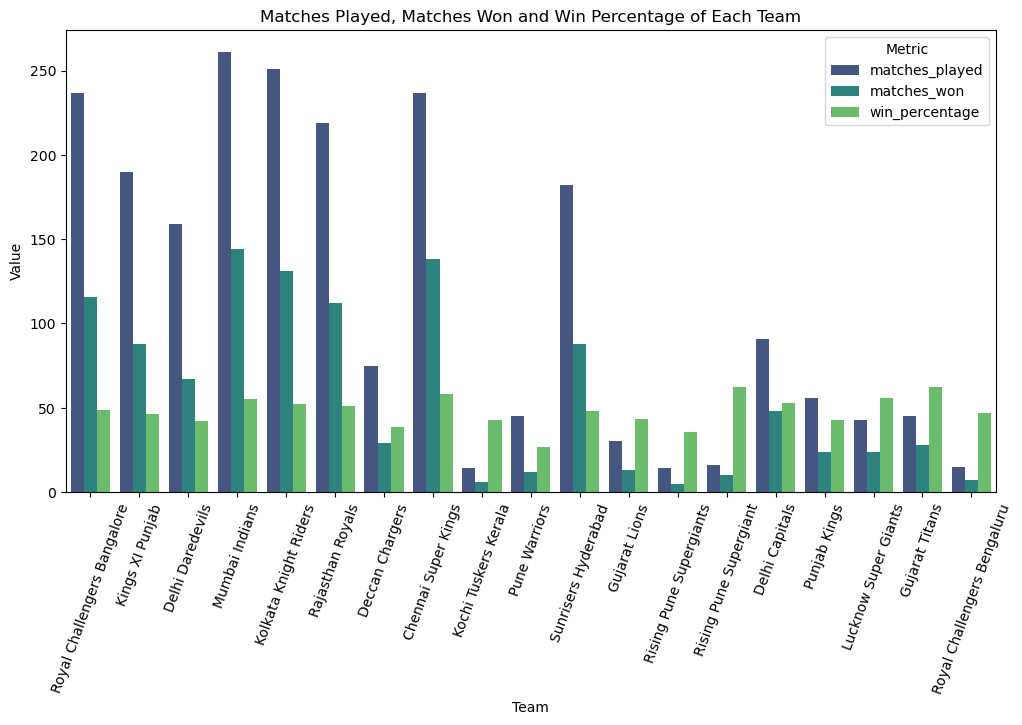

In [52]:
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['matches_played', 'matches_won', 'win_percentage'], 
                                    var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='team_name', y='Value', hue='Metric', data=team_stats_melted, palette='viridis')
plt.title('Matches Played, Matches Won and Win Percentage of Each Team')
plt.xlabel('Team')
plt.ylabel('Value')
plt.xticks(rotation=70)
plt.legend(title='Metric')
plt.show()

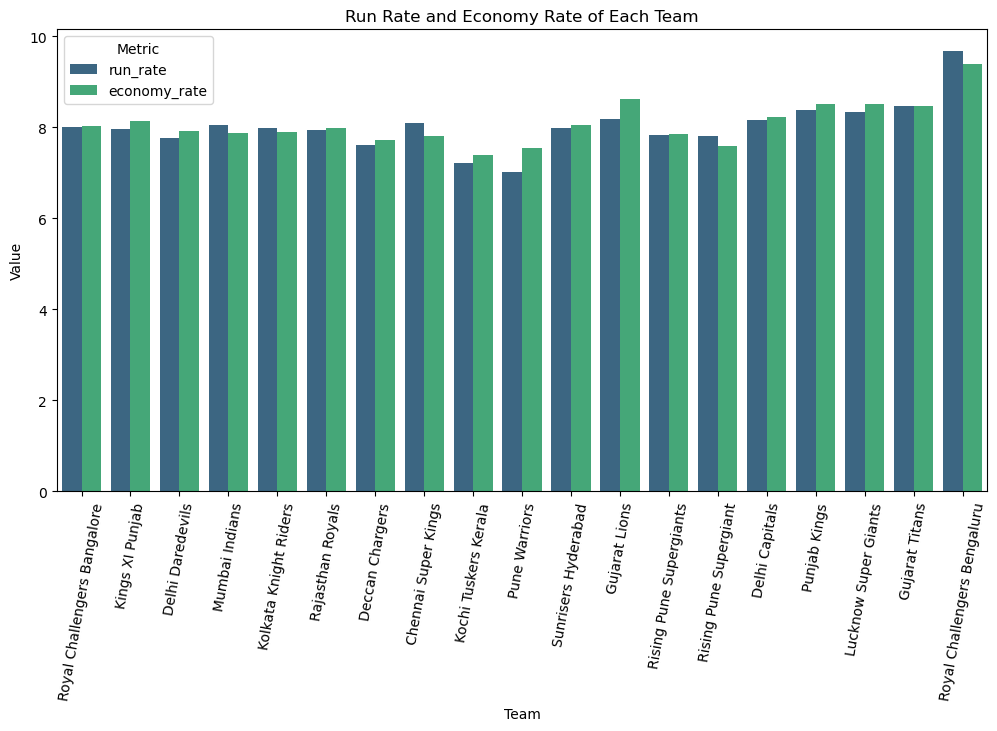

In [53]:
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['run_rate', 'economy_rate'], 
                                    var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(x='team_name', y='Value', hue='Metric', data=team_stats_melted, palette='viridis')
plt.title('Run Rate and Economy Rate of Each Team')
plt.xlabel('Team')
plt.ylabel('Value')
plt.xticks(rotation=80)
plt.legend(title='Metric')
plt.show()

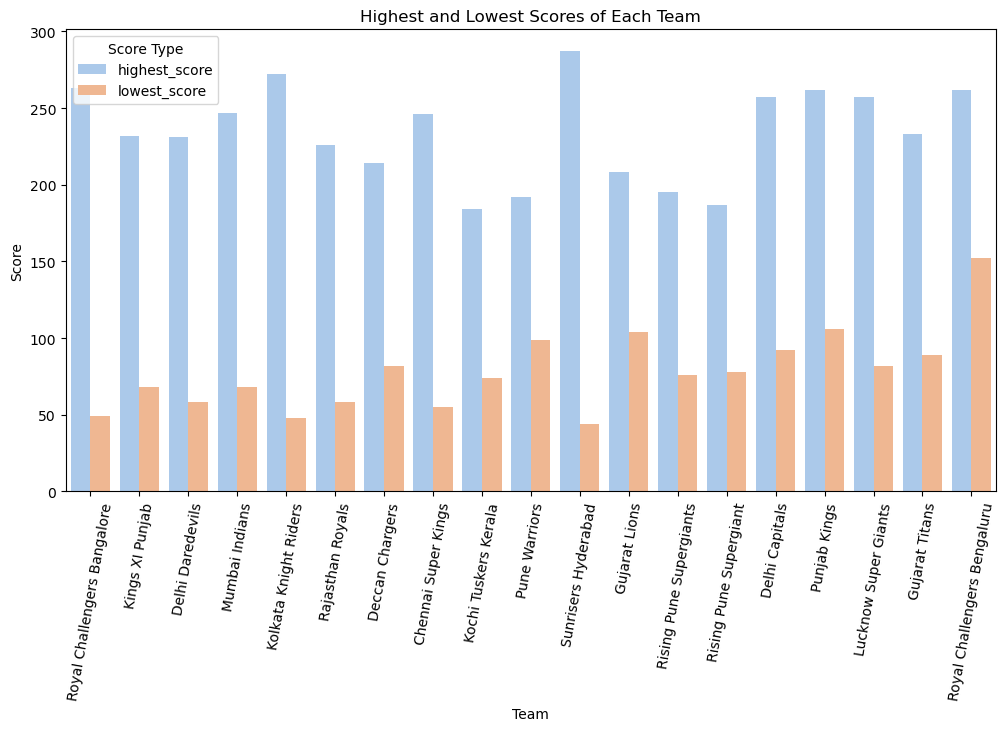

In [54]:
plt.figure(figsize=(12, 6))
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['highest_score', 'lowest_score'], 
                                    var_name='Score Type', value_name='Score')

sns.barplot(x='team_name', y='Score', hue='Score Type', data=team_stats_melted, palette='pastel')
plt.title('Highest and Lowest Scores of Each Team')
plt.xlabel('Team')
plt.ylabel('Score')
plt.xticks(rotation=80)
plt.show()

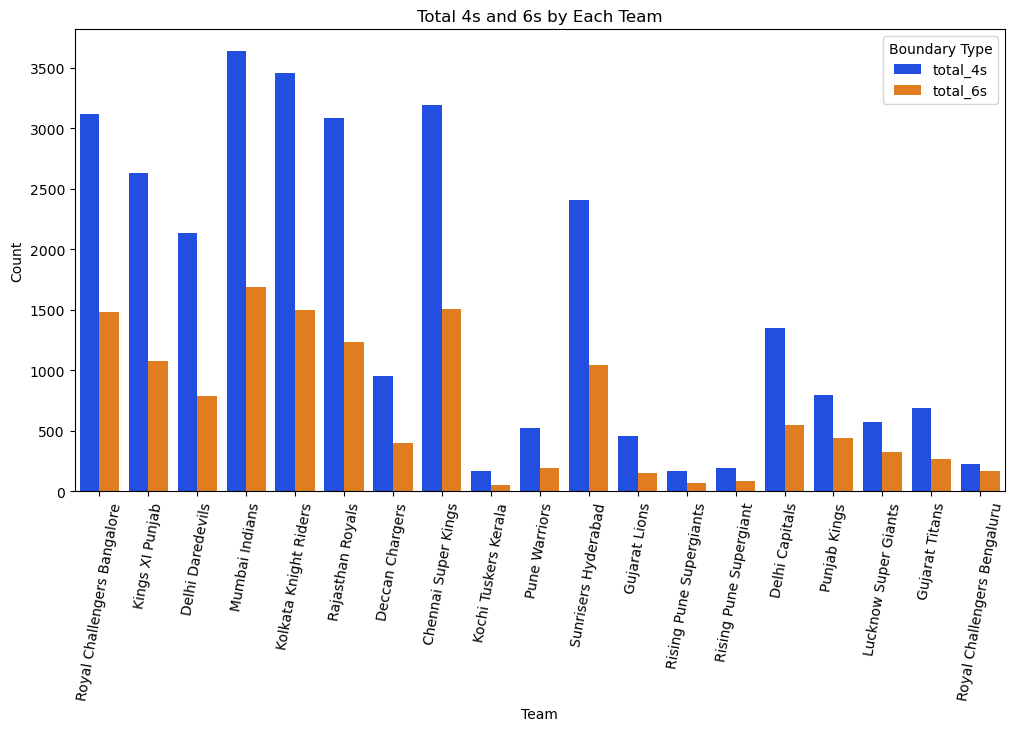

In [55]:
plt.figure(figsize=(12, 6))
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['total_4s', 'total_6s'], 
                                    var_name='Boundary Type', value_name='Count')
sns.barplot(x='team_name', y='Count', hue='Boundary Type', data=team_stats_melted, palette='bright')
plt.title('Total 4s and 6s by Each Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()


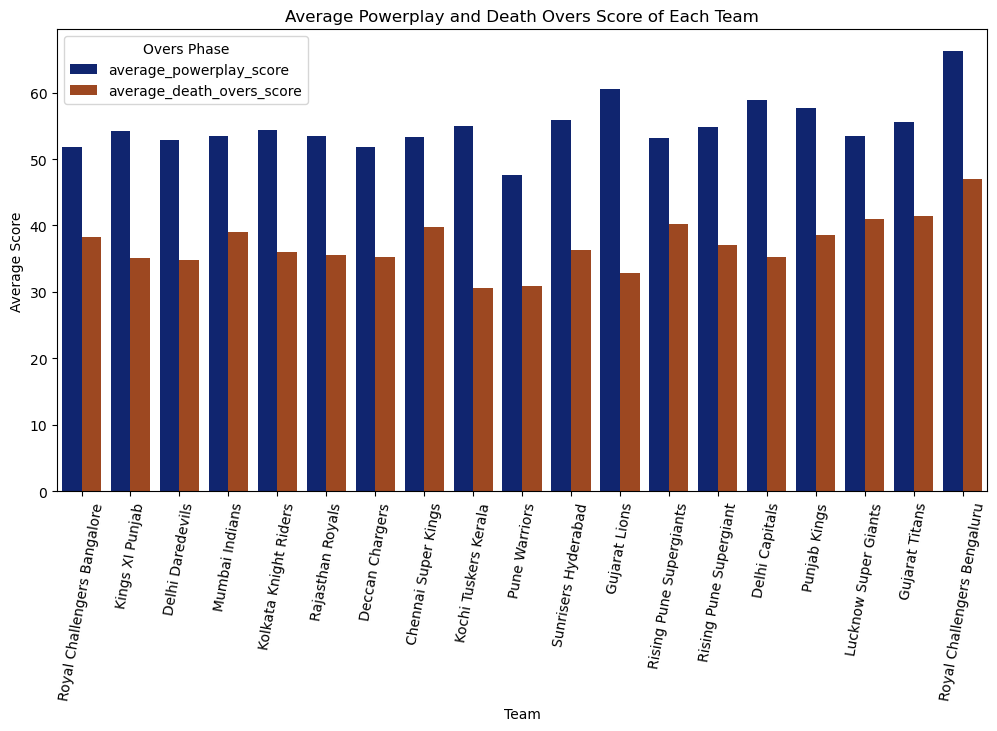

In [56]:
plt.figure(figsize=(12, 6))
team_stats_melted = team_stats.melt(id_vars=['team_name'], value_vars=['average_powerplay_score', 'average_death_overs_score'], 
                                    var_name='Overs Phase', value_name='Average Score')
sns.barplot(x='team_name', y='Average Score', hue='Overs Phase', data=team_stats_melted, palette='dark')
plt.title('Average Powerplay and Death Overs Score of Each Team')
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.xticks(rotation=80)
plt.show()


In [62]:
players.head()

,df2,balls_faced_x,innings_x,runs_x,0s_x,1s_x,2s_x,3s_x,4s_x,6s_x,...,batting_avg_y,batting_strike_rate_y,balls_throw_y,wickets_y,overs_y,runs_conceded_y,bowling_econ_y,bowling_strike_rate_y,catches_y,man_of_the_match_count
A Ashish Reddy,28.0,196.0,2.0,280.0,61.0,83.0,20.0,1.0,16.0,15.0,...,18.67,142.86,270.0,18.0,45.0,396.0,8.80,15.00,9.0,0.0
A Badoni,35.0,505.0,2.0,634.0,183.0,201.0,48.0,3.0,46.0,24.0,...,24.38,125.54,25.0,2.0,4.0,36.0,9.00,12.50,14.0,0.0
A Chandila,12.0,7.0,1.0,4.0,3.0,4.0,0.0,0.0,0.0,0.0,...,4.00,57.14,234.0,11.0,39.0,242.0,6.21,21.27,7.0,1.0
A Chopra,6.0,75.0,2.0,53.0,45.0,21.0,2.0,0.0,7.0,0.0,...,10.60,70.67,0.0,0.0,0.0,0.0,0.00,0.00,2.0,0.0
A Choudhary,5.0,20.0,2.0,25.0,4.0,13.0,1.0,0.0,1.0,1.0,...,12.50,125.00,108.0,5.0,18.0,144.0,8.00,21.60,0.0,0.0


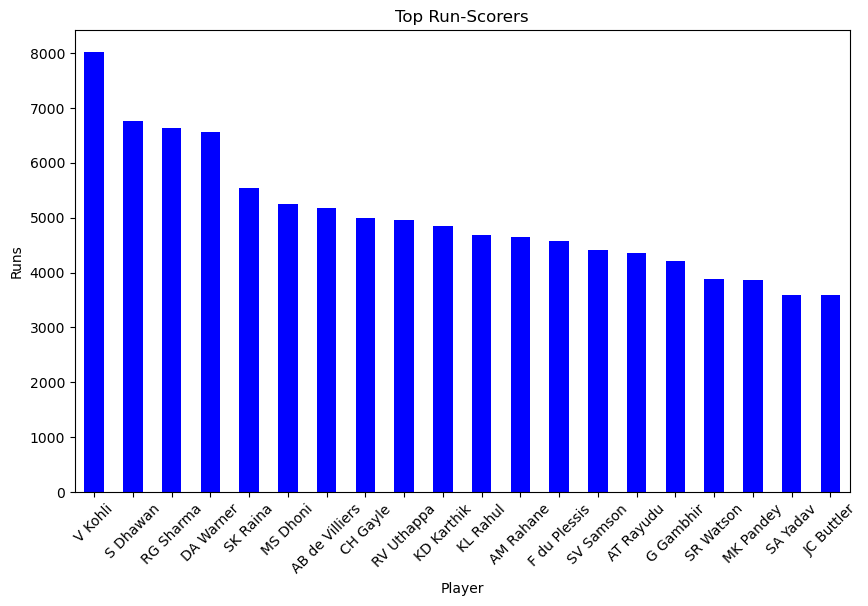

In [66]:
plt.figure(figsize=(10, 6))
top_run_scorers = players['runs_x'].nlargest(20)
top_run_scorers.plot(kind='bar', color='blue')
plt.xlabel('Player')
plt.ylabel('Runs')
plt.title('Top Run-Scorers')
plt.xticks(rotation=45)
plt.show()

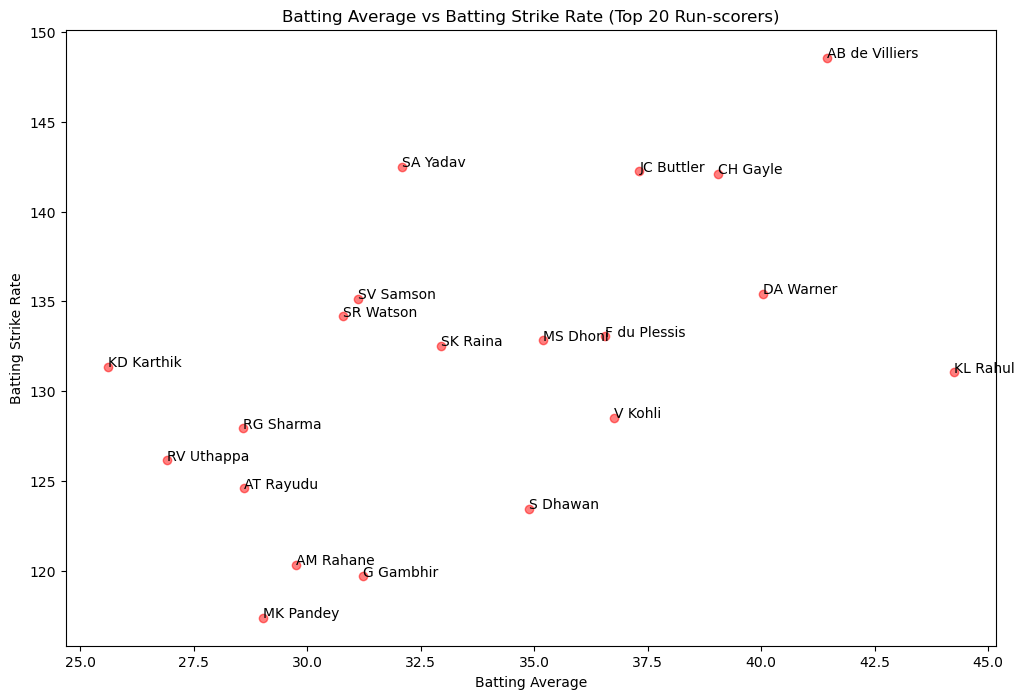

In [68]:
top_run_scorers = players.nlargest(20, 'runs_x')

# Plotting Batting Average vs Batting Strike Rate for the top 20 run-scorers
plt.figure(figsize=(12, 8))
plt.scatter(top_run_scorers['batting_avg_y'], top_run_scorers['batting_strike_rate_y'], color='red', alpha=0.5)
plt.xlabel('Batting Average')
plt.ylabel('Batting Strike Rate')
plt.title('Batting Average vs Batting Strike Rate (Top 20 Run-scorers)')

# Annotate each point with the player name
for i, player in top_run_scorers.iterrows():
    plt.annotate(i, (player['batting_avg_y'], player['batting_strike_rate_y']))

plt.show()

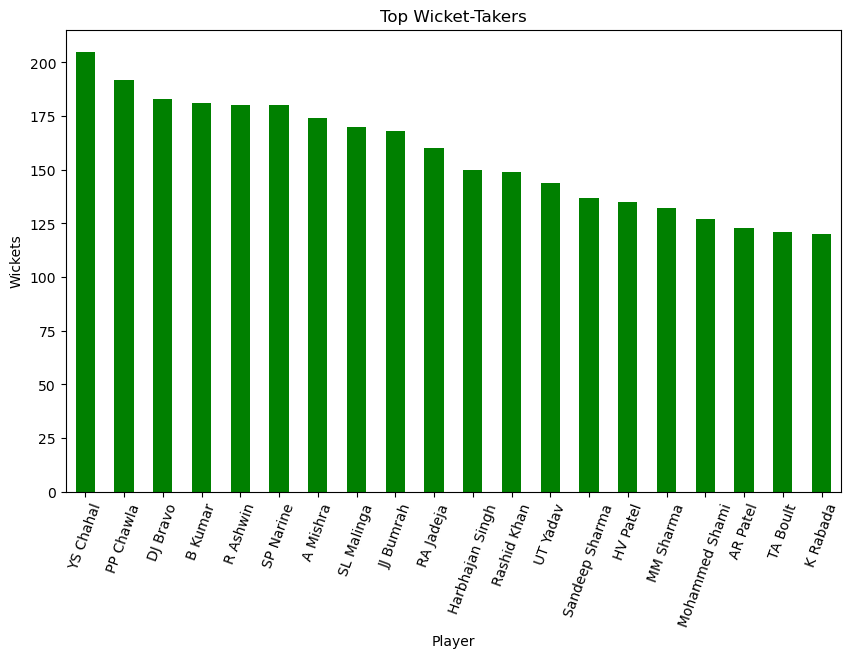

In [70]:
plt.figure(figsize=(10, 6))
top_wicket_takers = players['wickets_y'].nlargest(20)
top_wicket_takers.plot(kind='bar', color='green')
plt.xlabel('Player')
plt.ylabel('Wickets')
plt.title('Top Wicket-Takers')
plt.xticks(rotation=70)
plt.show()

In [72]:
plt.figure(figsize=(10, 6))
highest_scores = players['highest_score'].nlargest(20)
highest_scores.plot(kind='bar', color='purple')
plt.xlabel('Player')
plt.ylabel('Highest Score')
plt.title('Highest Individual Scores')
plt.xticks(rotation=45)
plt.show()

KeyError: 'highest_score'

<Figure size 1000x600 with 0 Axes>

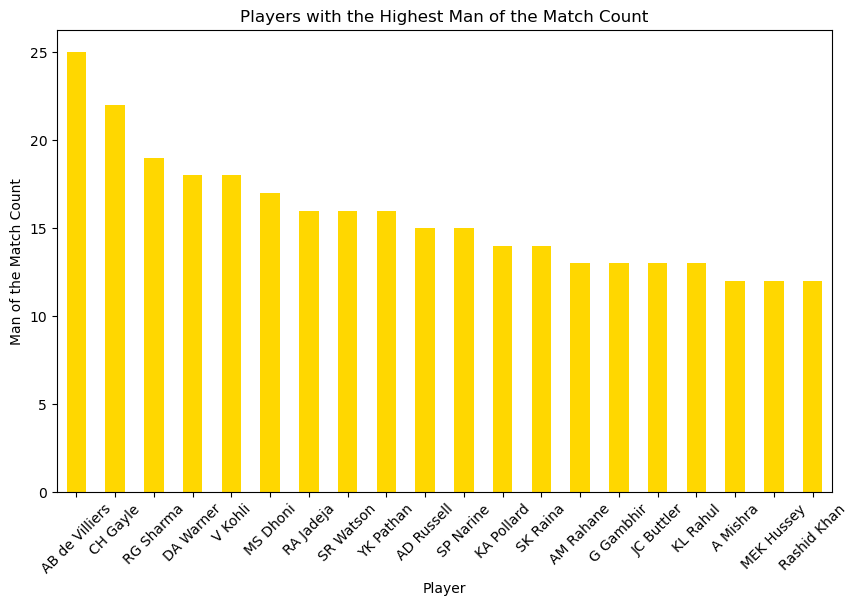

In [75]:
plt.figure(figsize=(10, 6))
top_mom_players = players['man_of_the_match_count'].nlargest(20)
top_mom_players.plot(kind='bar', color='gold')
plt.xlabel('Player')
plt.ylabel('Man of the Match Count')
plt.title('Players with the Highest Man of the Match Count')
plt.xticks(rotation=45)
plt.show()

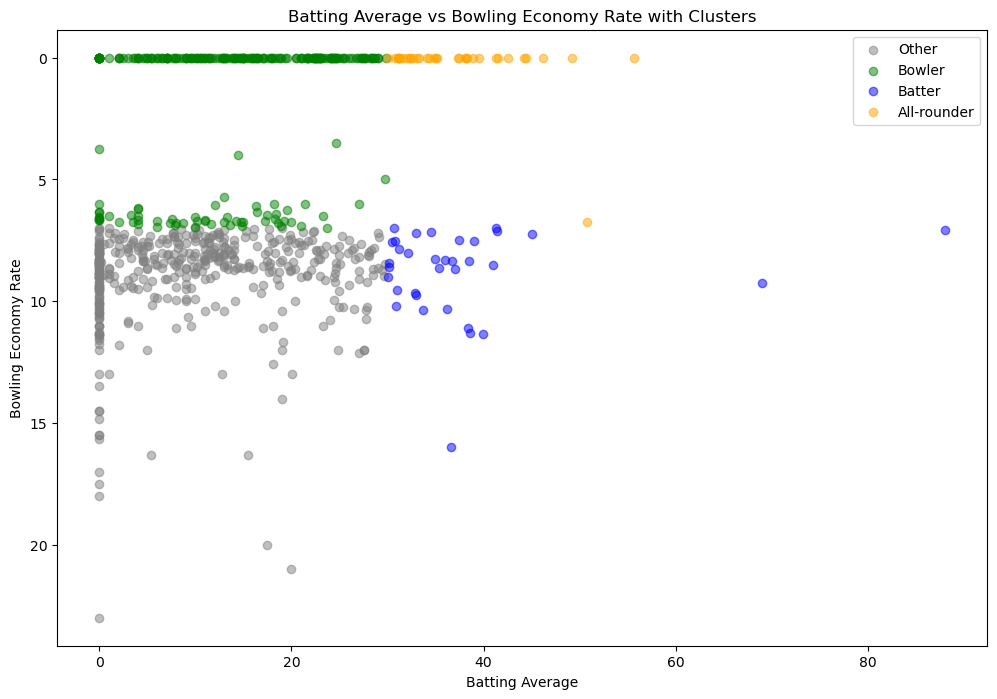

In [79]:
batting_avg_threshold = 30
bowling_econ_threshold = 7

# Identify clusters
players['cluster'] = 'Other'
players.loc[players['batting_avg_y'] > batting_avg_threshold, 'cluster'] = 'Batter'
players.loc[players['bowling_econ_y'] < bowling_econ_threshold, 'cluster'] = 'Bowler'
players.loc[(players['batting_avg_y'] > batting_avg_threshold) & (players['bowling_econ_y'] < bowling_econ_threshold), 'cluster'] = 'All-rounder'

# Plotting Batting Average vs Bowling Economy Rate with clusters
plt.figure(figsize=(12, 8))
colors = {'Batter': 'blue', 'Bowler': 'green', 'All-rounder': 'orange', 'Other': 'grey'}

for cluster in players['cluster'].unique():
    subset = players[players['cluster'] == cluster]
    plt.scatter(subset['batting_avg_y'], subset['bowling_econ_y'], 
                color=colors[cluster], label=cluster, alpha=0.5)

plt.xlabel('Batting Average')
plt.ylabel('Bowling Economy Rate')
plt.title('Batting Average vs Bowling Economy Rate with Clusters')
plt.gca().invert_yaxis()  # Invert y-axis to show better economy rates higher up
plt.legend()
plt.show()

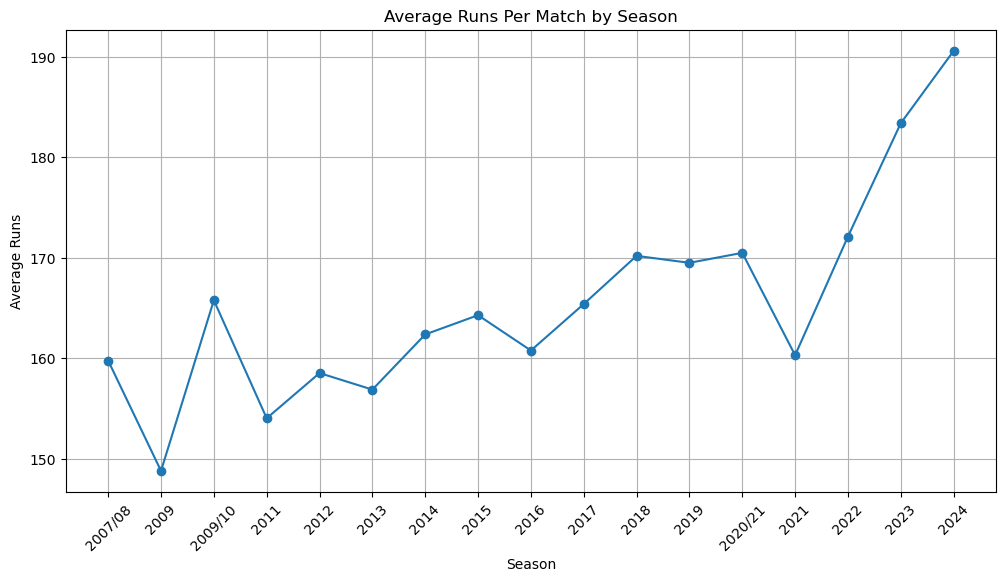

In [81]:
seasonal_runs = df2.groupby('season').agg({'target_runs': 'mean'}).reset_index()
seasonal_runs.columns = ['season', 'average_runs']

plt.figure(figsize=(12, 6))
plt.plot(seasonal_runs['season'], seasonal_runs['average_runs'], marker='o')
plt.title('Average Runs Per Match by Season')
plt.xlabel('Season')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [84]:
df1 = df1.copy()
df2 = df2.copy()

In [85]:
inning_scores = df1.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()
inning_scores = inning_scores[inning_scores['inning']==1]
inning_scores.head()

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110


In [86]:
inning_scores['target'] = inning_scores['total_runs'] + 1
inning_scores.head()

,match_id,inning,total_runs,target
0,335982,1,222,223
2,335983,1,240,241
4,335984,1,129,130
6,335985,1,165,166
8,335986,1,110,111


In [88]:
df2.rename(columns={'id': 'match_id'}, inplace=True)
df2.head()

,season,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,...,target_runs,target_overs,super_over,umpire1,umpire2,year,month,day,season_start,season_end
0,2007/08,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,...,223.0,20.0,N,Asad Rauf,RE Koertzen,2008,4,18,2007,2008
1,2007/08,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,...,241.0,20.0,N,MR Benson,SL Shastri,2008,4,19,2007,2008
2,2007/08,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,...,130.0,20.0,N,Aleem Dar,GA Pratapkumar,2008,4,19,2007,2008
3,2007/08,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,...,166.0,20.0,N,SJ Davis,DJ Harper,2008,4,20,2007,2008
4,2007/08,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,...,111.0,20.0,N,BF Bowden,K Hariharan,2008,4,20,2007,2008
